In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Dataset

In [94]:
data = pd.read_csv('car_fuel_efficiency.csv')

In [95]:
data.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [96]:
n = len(data)
n

9704

In [97]:
cols = ['engine_displacement', 'horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']

In [98]:
df = data[cols]

In [99]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

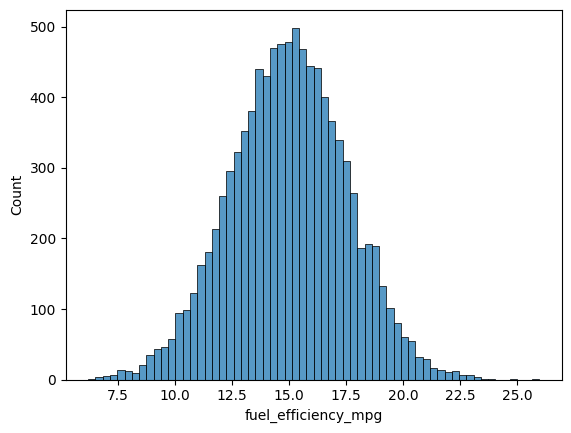

In [100]:
sns.histplot(df.fuel_efficiency_mpg)

In [101]:
# Creating a column called age
df.model_year.max()

np.int64(2023)

### Question 1. Missing values 
There's one column with missing values. What is it?

In [102]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


The column "horsepower" has 8996 which is lower than the length 9704

### Question 2. Median for horse power
What's the median (50% percentile) for variable 'horsepower'?

In [103]:
df.horsepower.median()

np.float64(149.0)

#### Prepare and split the dataset

In [104]:
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 9701, 9702, 9703], shape=(9704,))

Shuffle the dataset (the filtered one you created above), use seed 42.

In [105]:
np.random.seed(42)
np.random.shuffle(idx)

Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [106]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [107]:
n_train, n_val, n_test

(5824, 1940, 1940)

In [108]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [109]:
y_train = df_train.fuel_efficiency_mpg
y_val = df_val.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg

In [110]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [111]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006
...,...,...,...,...
1696,260,139.0,2606.972984,2009
5685,280,132.0,4004.214323,2014
6735,210,152.0,2500.175687,2020
2052,250,154.0,2254.313245,2002


### Question 3. Filling NAs

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Filling missing values in Horsepower with 0s

In [112]:
def rmse(y, y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [113]:
# Creating a function to prepare X
def prepare_X_age(df,missing_values=0):
    df_num = df.copy()
    features = cols.copy()
    
    df_num['age'] = 2023 - df_num.model_year   
    features.append('age')

    del df_num['model_year']
    
    df_num = df_num.fillna(missing_values)
    X = df_num.values
    
    return X

In [114]:
# Creating a function to prepare X
def prepare_X(df,missing_values=0):
    df_num = df.copy()
    
    df_num = df_num.fillna(missing_values)
    X = df_num.values
    
    return X

In [115]:
# Code for training a linear regression model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y)

    w0 = w_full[0]
    w = w_full[1:]
    
    return w0, w

In [116]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006
...,...,...,...,...
1696,260,139.0,2606.972984,2009
5685,280,132.0,4004.214323,2014
6735,210,152.0,2500.175687,2020
2052,250,154.0,2254.313245,2002


In [117]:
# Fitting the model after filling null values with zero
X_train = prepare_X(df_train,0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred), round(rmse(y_val, y_pred),2)

(np.float64(0.5173782638844466), np.float64(0.52))

In [118]:
X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

Fitting the model after filling NAs with mean value

In [119]:
mean_val = df_train.horsepower.mean()
mean_val

np.float64(149.54476367006487)

In [120]:
# Fitting the model after filling null values with mean
X_train = prepare_X(df_train,mean_val)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred), round(rmse(y_val, y_pred),2)

(np.float64(0.6116860277058284), np.float64(0.61))

### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [121]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y)

    w0 = w_full[0]
    w = w_full[1:]
    
    return w0, w

In [122]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train,0) # Filling NAs with zeros
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)
    print(r, w0, round(score,2))

0 28.82736547365895 0.52
0.01 24.92683841981215 0.52
0.1 11.239661084581073 0.52
1 1.7315979411219746 0.52
5 0.3638075020482907 0.52
10 0.18306246621686947 0.52
100 0.01841801730688404 0.52


### Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [123]:
# Function for testing different seed values without regularization
def seed_split(df, seed=0, null_val=0):
    df_seed = df.copy()
    n = len(df_seed)
    
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    df_train = df_seed.iloc[idx[:n_train]]
    df_val = df_seed.iloc[idx[n_train:n_train+n_val]]
    df_test = df_seed.iloc[idx[n_train+n_val:]]

    y_train = df_train.fuel_efficiency_mpg
    y_val = df_val.fuel_efficiency_mpg
    y_test = df_test.fuel_efficiency_mpg
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X(df_train,null_val)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    return rmse(y_val, y_pred)
    

Standard Deviation is: 0.007


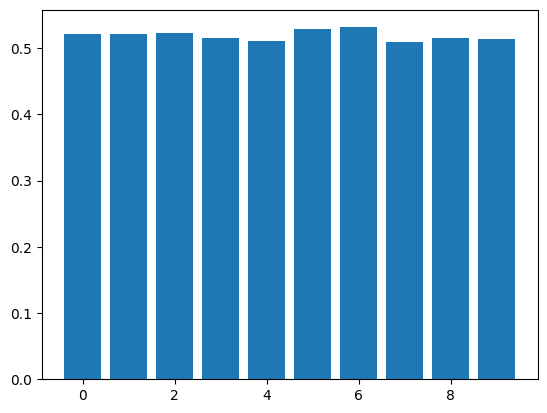

In [124]:
rmse_scores = []

for seed_val in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    val = seed_split(df, seed_val)
    rmse_scores.append(val)

# plotting the rmse of all values
x_val = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.bar(x_val, rmse_scores)

std_dev = np.std(rmse_scores)
print("Standard Deviation is:", round(std_dev, 3))

### Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [125]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [126]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

y_train = df_train.fuel_efficiency_mpg
y_val = df_val.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [127]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,engine_displacement,horsepower,vehicle_weight,model_year
0,240,136.0,4050.512290,2006
1,190,141.0,3195.866942,2017
2,200,184.0,3006.164370,2017
3,200,NaN,2947.143980,2022
4,250,132.0,3114.371978,2001
...,...,...,...,...
7759,200,167.0,3470.715658,2003
7760,180,144.0,3605.310144,2016
7761,180,154.0,3346.965671,2018
7762,210,152.0,2500.175687,2020


In [128]:
y_full_train = np.concatenate([y_train, y_val])

In [129]:
X_full_train = prepare_X(df_full_train,0)
w0, w = train_linear_regression_reg(X_full_train, y_full_train,0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

rmse(y_test, y_pred)

np.float64(0.5156261299169602)